In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
df_node = pd.read_csv(r'C:\Users\46981\Desktop\复杂网络\SiouxFalls_node.txt',sep ='\s+')
df_net =  pd.read_csv(r'C:\Users\46981\Desktop\复杂网络\SiouxFalls_net.txt',sep ='\s+')

In [3]:
df_node = df_node[['Node','X','Y']]
df_node

,Node,X,Y
0,1,50000,510000
1,2,320000,510000
2,3,50000,440000
3,4,130000,440000
4,5,220000,440000
5,6,320000,440000
6,7,420000,380000
7,8,320000,380000
8,9,220000,380000
9,10,220000,320000


In [4]:
df_net

,Init_node,Term_node,Capacity,Length,Free_Flow_Time,B,Power,Speed_limit,Toll,Type,;
0,1,2,25900.200640,6,6,0.15,4,0,0,1,;
1,1,3,23403.473190,4,4,0.15,4,0,0,1,;
2,2,1,25900.200640,6,6,0.15,4,0,0,1,;
3,2,6,4958.180928,5,5,0.15,4,0,0,1,;
4,3,1,23403.473190,4,4,0.15,4,0,0,1,;
...,...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1,;
72,23,24,5078.508436,2,2,0.15,4,0,0,1,;
73,24,13,5091.256152,4,4,0.15,4,0,0,1,;
74,24,21,4885.357564,3,3,0.15,4,0,0,1,;


In [5]:
init = df_net['Init_node'].values
term = df_net['Term_node'].values
init_term = np.vstack((init,term)).T
df_net = pd.merge(df_net,df_node,left_on ='Init_node',right_on = 'Node')
df_net = pd.merge(df_net,df_node,left_on ='Term_node',right_on = 'Node',suffixes=['_init','_term'])
df_net['laneX'] = 0.5*(df_net['X_init']+df_net['X_term'])
df_net['laneY'] = 0.5*(df_net['Y_init']+df_net['Y_term'])
df_net

,Init_node,Term_node,Capacity,Length,Free_Flow_Time,B,Power,Speed_limit,Toll,Type,;,Node_init,X_init,Y_init,Node_term,X_term,Y_term,laneX,laneY
0,1,2,25900.200640,6,6,0.15,4,0,0,1,;,1,50000,510000,2,320000,510000,185000.0,510000.0
1,6,2,4958.180928,5,5,0.15,4,0,0,1,;,6,320000,440000,2,320000,510000,320000.0,475000.0
2,1,3,23403.473190,4,4,0.15,4,0,0,1,;,1,50000,510000,3,50000,440000,50000.0,475000.0
3,4,3,17110.523720,4,4,0.15,4,0,0,1,;,4,130000,440000,3,50000,440000,90000.0,440000.0
4,12,3,23403.473190,4,4,0.15,4,0,0,1,;,12,50000,320000,3,50000,440000,50000.0,380000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,21,20,5059.912340,6,6,0.15,4,0,0,1,;,21,220000,50000,20,320000,50000,270000.0,50000.0
72,22,20,5075.697193,5,5,0.15,4,0,0,1,;,22,220000,130000,20,320000,50000,270000.0,90000.0
73,20,21,5059.912340,6,6,0.15,4,0,0,1,;,20,320000,50000,21,220000,50000,270000.0,50000.0
74,22,21,5229.910063,2,2,0.15,4,0,0,1,;,22,220000,130000,21,220000,50000,220000.0,90000.0


(31400.0, 440600.0, 26900.0, 535100.0)

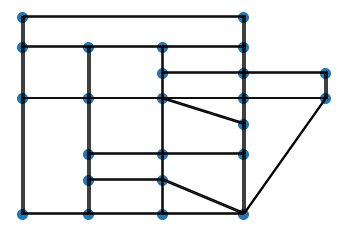

In [6]:
net_list = []
plt.scatter(df_node['X'],df_node['Y'],s=100)
for i in range(len(df_net)):
    net_list.append([init[i],term[i]])
    if df_net['Init_node'][i]>df_net['Term_node'][i]:
        plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='k')
    else:
        plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='k')
plt.axis('off')

In [7]:
init = df_net['Init_node'].values
term = df_net['Term_node'].values

In [8]:
ar_dual = np.zeros([394,4])
ar_dual[:,0] = np.arange(0,394)
lis_init = []
lis_term = []
num = 0
for i in range(75):
    for j in range(i+1,76):
        set0 = {init[i],term[i]}&{init[j],term[j]}
        if len(set0)!=0:
            ar_dual[num,1] = i
            ar_dual[num,2] = j
            ar_dual[num,3] = df_net['Free_Flow_Time'][i]+df_net['Free_Flow_Time'][j]
            lis_init.append([init[i],term[i]])
            lis_term.append([init[j],term[j]])
            num+=1
print(ar_dual)

[[  0.   0.   1.  11.]
 [  1.   0.   2.  10.]
 [  2.   0.   5.  12.]
 ...
 [391.  73.  74.   8.]
 [392.  73.  75.   9.]
 [393.  74.  75.   5.]]


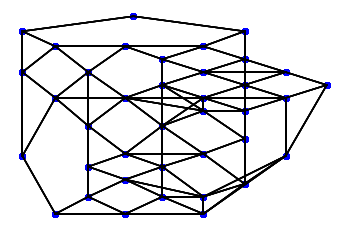

394


Text(0, 0.5, 'times')

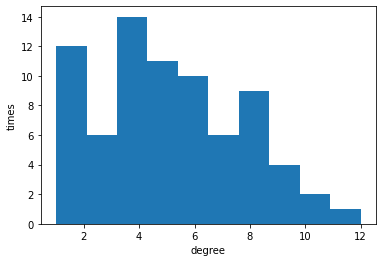

In [9]:
ava_degree = []
degree = []
for i in range(len(df_net)-1):
    degree0 = 0
    for j in range(i+1,len(df_net)):
        if [i,j] in ar_dual[:,1:3].tolist():
            plt.scatter(df_net['laneX'][i],df_net['laneY'][i],c='b')
            plt.scatter(df_net['laneX'][j],df_net['laneY'][j],c='b')
            plt.plot([df_net['laneX'][i],df_net['laneX'][j]],[df_net['laneY'][i],df_net['laneY'][j]],c='k')
            degree0 +=1
    degree.append(degree0)
plt.axis('off')
plt.show()
print(np.array(degree).sum())
ava_degree.append(len(ar_dual)/76)
plt.hist(degree)
plt.xlabel('degree')
plt.ylabel('times')

In [10]:
ar = np.ones([len(df_node),len(df_node)])*100000
capacity = np.ones([len(df_node),len(df_node)])*0.0001

In [11]:
for i in range(len(df_node)):
    for j in range(len(df_node)):
        if i == j:
            ar[i][j]=0
        if len(df_net[(df_net['Init_node']==i+1)&(df_net['Term_node']==j+1)])!=0:
            ar[i][j] = df_net[(df_net['Init_node']==i+1)&(df_net['Term_node']==j+1)]['Free_Flow_Time']
            capacity[i][j] = df_net[(df_net['Init_node']==i+1)&(df_net['Term_node']==j+1)]['Capacity']
print(ar)

[[     0.      6.      4. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000.]
 [     6.      0. 100000. 100000. 100000.      5. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000.]
 [     4. 100000.      0.      4. 100000. 100000. 100000. 100000. 100000.
  100000. 100000.      4. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000.]
 [100000. 100000.      4.      0.      2. 100000. 100000. 100000. 100000.
  100000.      6. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000.]
 [100000. 100000. 100000.      2.      0.      4. 100000. 100000.      5.
  100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000. 100000.
  100000. 100000. 100000. 100000. 100000. 100000.]
 [100

In [12]:
OD = pd.DataFrame([{1 :      0.0,     2 :    100.0,     3 :    100.0,     4 :    500.0,     5 :    200.0, 
    6 :    300.0,     7 :    500.0,     8 :    800.0,     9 :    500.0,    10 :   1300.0, 
   11 :    500.0,    12 :    200.0,    13 :    500.0,    14 :    300.0,    15 :    500.0, 
   16 :    500.0,    17 :    400.0,    18 :    100.0,    19 :    300.0,    20 :    300.0, 
   21 :    100.0,    22 :    400.0,    23 :    300.0,    24 :    100.0},{1 :    100.0,     2 :      0.0,     3 :    100.0,     4 :    200.0,     5 :    100.0, 
    6 :    400.0,     7 :    200.0,     8 :    400.0,     9 :    200.0,    10 :    600.0, 
   11 :    200.0,    12 :    100.0,    13 :    300.0,    14 :    100.0,    15 :    100.0, 
   16 :    400.0,    17 :    200.0,    18 :      0.0,    19 :    100.0,    20 :    100.0, 
   21 :      0.0,    22 :    100.0,    23 :      0.0,    24 :      0.0},{   1 :    100.0,     2 :    100.0,     3 :      0.0,     4 :    200.0,     5 :    100.0, 
    6 :    300.0,     7 :    100.0,     8 :    200.0,     9 :    100.0,    10 :    300.0, 
   11 :    300.0,    12 :    200.0,    13 :    100.0,    14 :    100.0,    15 :    100.0, 
   16 :    200.0,    17 :    100.0,    18 :      0.0,    19 :      0.0,    20 :      0.0, 
   21 :      0.0,    22 :    100.0,    23 :    100.0,    24 :      0.0},{ 1 :    500.0,     2 :    200.0,     3 :    200.0,     4 :      0.0,     5 :    500.0, 
    6 :    400.0,     7 :    400.0,     8 :    700.0,     9 :    700.0,    10 :   1200.0, 
   11 :   1400.0,    12 :    600.0,    13 :    600.0,    14 :    500.0,    15 :    500.0, 
   16 :    800.0,    17 :    500.0,    18 :    100.0,    19 :    200.0,    20 :    300.0, 
   21 :    200.0,    22 :    400.0,    23 :    500.0,    24 :    200.0},{1 :    200.0,     2 :    100.0,     3 :    100.0,     4 :    500.0,     5 :      0.0, 
    6 :    200.0,     7 :    200.0,     8 :    500.0,     9 :    800.0,    10 :   1000.0, 
   11 :    500.0,    12 :    200.0,    13 :    200.0,    14 :    100.0,    15 :    200.0, 
   16 :    500.0,    17 :    200.0,    18 :      0.0,    19 :    100.0,    20 :    100.0, 
   21 :    100.0,    22 :    200.0,    23 :    100.0,    24 :      0.0},{1 :    300.0,     2 :    400.0,     3 :    300.0,     4 :    400.0,     5 :    200.0, 
    6 :      0.0,     7 :    400.0,     8 :    800.0,     9 :    400.0,    10 :    800.0, 
   11 :    400.0,    12 :    200.0,    13 :    200.0,    14 :    100.0,    15 :    200.0, 
   16 :    900.0,    17 :    500.0,    18 :    100.0,    19 :    200.0,    20 :    300.0, 
   21 :    100.0,    22 :    200.0,    23 :    100.0,    24 :    100.0},{1 :    500.0,     2 :    200.0,     3 :    100.0,     4 :    400.0,     5 :    200.0, 
    6 :    400.0,     7 :      0.0,     8 :   1000.0,     9 :    600.0,    10 :   1900.0, 
   11 :    500.0,    12 :    700.0,    13 :    400.0,    14 :    200.0,    15 :    500.0, 
   16 :   1400.0,    17 :   1000.0,    18 :    200.0,    19 :    400.0,    20 :    500.0, 
   21 :    200.0,    22 :    500.0,    23 :    200.0,    24 :    100.0},{1 :    800.0,     2 :    400.0,     3 :    200.0,     4 :    700.0,     5 :    500.0, 
    6 :    800.0,     7 :   1000.0,     8 :      0.0,     9 :    800.0,    10 :   1600.0, 
   11 :    800.0,    12 :    600.0,    13 :    600.0,    14 :    400.0,    15 :    600.0, 
   16 :   2200.0,    17 :   1400.0,    18 :    300.0,    19 :    700.0,    20 :    900.0, 
   21 :    400.0,    22 :    500.0,    23 :    300.0,    24 :    200.0},{    1 :    500.0,     2 :    200.0,     3 :    100.0,     4 :    700.0,     5 :    800.0, 
    6 :    400.0,     7 :    600.0,     8 :    800.0,     9 :      0.0,    10 :   2800.0, 
   11 :   1400.0,    12 :    600.0,    13 :    600.0,    14 :    600.0,    15 :    900.0, 
   16 :   1400.0,    17 :    900.0,    18 :    200.0,    19 :    400.0,    20 :    600.0, 
   21 :    300.0,    22 :    700.0,    23 :    500.0,    24 :    200.0},{    1 :   1300.0,     2 :    600.0,     3 :    300.0,     4 :   1200.0,     5 :   1000.0, 
    6 :    800.0,     7 :   1900.0,     8 :   1600.0,     9 :   2800.0,    10 :      0.0, 
   11 :   4000.0,    12 :   2000.0,    13 :   1900.0,    14 :   2100.0,    15 :   4000.0, 
   16 :   4400.0,    17 :   3900.0,    18 :    700.0,    19 :   1800.0,    20 :   2500.0, 
   21 :   1200.0,    22 :   2600.0,    23 :   1800.0,    24 :    800.0},{    1 :    500.0,     2 :    200.0,     3 :    300.0,     4 :   1500.0,     5 :    500.0, 
    6 :    400.0,     7 :    500.0,     8 :    800.0,     9 :   1400.0,    10 :   3900.0, 
   11 :      0.0,    12 :   1400.0,    13 :   1000.0,    14 :   1600.0,    15 :   1400.0, 
   16 :   1400.0,    17 :   1000.0,    18 :    100.0,    19 :    400.0,    20 :    600.0, 
   21 :    400.0,    22 :   1100.0,    23 :   1300.0,    24 :    600.0},{   1 :    200.0,     2 :    100.0,     3 :    200.0,     4 :    600.0,     5 :    200.0, 
    6 :    200.0,     7 :    700.0,     8 :    600.0,     9 :    600.0,    10 :   2000.0, 
   11 :   1400.0,    12 :      0.0,    13 :   1300.0,    14 :    700.0,    15 :    700.0, 
   16 :    700.0,    17 :    600.0,    18 :    200.0,    19 :    300.0,    20 :    400.0, 
   21 :    300.0,    22 :    700.0,    23 :    700.0,    24 :    500.0},{    1 :    500.0,     2 :    300.0,     3 :    100.0,     4 :    600.0,     5 :    200.0, 
    6 :    200.0,     7 :    400.0,     8 :    600.0,     9 :    600.0,    10 :   1900.0, 
   11 :   1000.0,    12 :   1300.0,    13 :      0.0,    14 :    600.0,    15 :    700.0, 
   16 :    600.0,    17 :    500.0,    18 :    100.0,    19 :    300.0,    20 :    600.0, 
   21 :    600.0,    22 :   1300.0,    23 :    800.0,    24 :    800.0},{    1 :    300.0,     2 :    100.0,     3 :    100.0,     4 :    500.0,     5 :    100.0, 
    6 :    100.0,     7 :    200.0,     8 :    400.0,     9 :    600.0,    10 :   2100.0, 
   11 :   1600.0,    12 :    700.0,    13 :    600.0,    14 :      0.0,    15 :   1300.0, 
   16 :    700.0,    17 :    700.0,    18 :    100.0,    19 :    300.0,    20 :    500.0, 
   21 :    400.0,    22 :   1200.0,    23 :   1100.0,    24 :    400.0},{    1 :    500.0,     2 :    100.0,     3 :    100.0,     4 :    500.0,     5 :    200.0, 
    6 :    200.0,     7 :    500.0,     8 :    600.0,     9 :   1000.0,    10 :   4000.0, 
   11 :   1400.0,    12 :    700.0,    13 :    700.0,    14 :   1300.0,    15 :      0.0, 
   16 :   1200.0,    17 :   1500.0,    18 :    200.0,    19 :    800.0,    20 :   1100.0, 
   21 :    800.0,    22 :   2600.0,    23 :   1000.0,    24 :    400.0},{   1 :    500.0,     2 :    400.0,     3 :    200.0,     4 :    800.0,     5 :    500.0, 
    6 :    900.0,     7 :   1400.0,     8 :   2200.0,     9 :   1400.0,    10 :   4400.0, 
   11 :   1400.0,    12 :    700.0,    13 :    600.0,    14 :    700.0,    15 :   1200.0, 
   16 :      0.0,    17 :   2800.0,    18 :    500.0,    19 :   1300.0,    20 :   1600.0, 
   21 :    600.0,    22 :   1200.0,    23 :    500.0,    24 :    300.0},{    1 :    400.0,     2 :    200.0,     3 :    100.0,     4 :    500.0,     5 :    200.0, 
    6 :    500.0,     7 :   1000.0,     8 :   1400.0,     9 :    900.0,    10 :   3900.0, 
   11 :   1000.0,    12 :    600.0,    13 :    500.0,    14 :    700.0,    15 :   1500.0, 
   16 :   2800.0,    17 :      0.0,    18 :    600.0,    19 :   1700.0,    20 :   1700.0, 
   21 :    600.0,    22 :   1700.0,    23 :    600.0,    24 :    300.0},{    1 :    100.0,     2 :      0.0,     3 :      0.0,     4 :    100.0,     5 :      0.0, 
    6 :    100.0,     7 :    200.0,     8 :    300.0,     9 :    200.0,    10 :    700.0, 
   11 :    200.0,    12 :    200.0,    13 :    100.0,    14 :    100.0,    15 :    200.0, 
   16 :    500.0,    17 :    600.0,    18 :      0.0,    19 :    300.0,    20 :    400.0, 
   21 :    100.0,    22 :    300.0,    23 :    100.0,    24 :      0.0},{    1 :    300.0,     2 :    100.0,     3 :      0.0,     4 :    200.0,     5 :    100.0, 
    6 :    200.0,     7 :    400.0,     8 :    700.0,     9 :    400.0,    10 :   1800.0, 
   11 :    400.0,    12 :    300.0,    13 :    300.0,    14 :    300.0,    15 :    800.0, 
   16 :   1300.0,    17 :   1700.0,    18 :    300.0,    19 :      0.0,    20 :   1200.0, 
   21 :    400.0,    22 :   1200.0,    23 :    300.0,    24 :    100.0},{    1 :    300.0,     2 :    100.0,     3 :      0.0,     4 :    300.0,     5 :    100.0, 
    6 :    300.0,     7 :    500.0,     8 :    900.0,     9 :    600.0,    10 :   2500.0, 
   11 :    600.0,    12 :    500.0,    13 :    600.0,    14 :    500.0,    15 :   1100.0, 
   16 :   1600.0,    17 :   1700.0,    18 :    400.0,    19 :   1200.0,    20 :      0.0, 
   21 :   1200.0,    22 :   2400.0,    23 :    700.0,    24 :    400.0},{    1 :    100.0,     2 :      0.0,     3 :      0.0,     4 :    200.0,     5 :    100.0, 
    6 :    100.0,     7 :    200.0,     8 :    400.0,     9 :    300.0,    10 :   1200.0, 
   11 :    400.0,    12 :    300.0,    13 :    600.0,    14 :    400.0,    15 :    800.0, 
   16 :    600.0,    17 :    600.0,    18 :    100.0,    19 :    400.0,    20 :   1200.0, 
   21 :      0.0,    22 :   1800.0,    23 :    700.0,    24 :    500.0},{    1 :    400.0,     2 :    100.0,     3 :    100.0,     4 :    400.0,     5 :    200.0, 
    6 :    200.0,     7 :    500.0,     8 :    500.0,     9 :    700.0,    10 :   2600.0, 
   11 :   1100.0,    12 :    700.0,    13 :   1300.0,    14 :   1200.0,    15 :   2600.0, 
   16 :   1200.0,    17 :   1700.0,    18 :    300.0,    19 :   1200.0,    20 :   2400.0, 
   21 :   1800.0,    22 :      0.0,    23 :   2100.0,    24 :   1100.0},{    1 :    300.0,     2 :      0.0,     3 :    100.0,     4 :    500.0,     5 :    100.0, 
    6 :    100.0,     7 :    200.0,     8 :    300.0,     9 :    500.0,    10 :   1800.0, 
   11 :   1300.0,    12 :    700.0,    13 :    800.0,    14 :   1100.0,    15 :   1000.0, 
   16 :    500.0,    17 :    600.0,    18 :    100.0,    19 :    300.0,    20 :    700.0, 
   21 :    700.0,    22 :   2100.0,    23 :      0.0,    24 :    700.0},{    1 :    100.0,     2 :      0.0,     3 :      0.0,     4 :    200.0,     5 :      0.0, 
    6 :    100.0,     7 :    100.0,     8 :    200.0,     9 :    200.0,    10 :    800.0, 
   11 :    600.0,    12 :    500.0,    13 :    700.0,    14 :    400.0,    15 :    400.0, 
   16 :    300.0,    17 :    300.0,    18 :      0.0,    19 :    100.0,    20 :    400.0, 
   21 :    500.0,    22 :   1100.0,    23 :    700.0,    24 :      0.0}],index = np.arange(1,25))
OD = OD.values*0.25
OD

array([[   0.,   25.,   25.,  125.,   50.,   75.,  125.,  200.,  125.,
         325.,  125.,   50.,  125.,   75.,  125.,  125.,  100.,   25.,
          75.,   75.,   25.,  100.,   75.,   25.],
       [  25.,    0.,   25.,   50.,   25.,  100.,   50.,  100.,   50.,
         150.,   50.,   25.,   75.,   25.,   25.,  100.,   50.,    0.,
          25.,   25.,    0.,   25.,    0.,    0.],
       [  25.,   25.,    0.,   50.,   25.,   75.,   25.,   50.,   25.,
          75.,   75.,   50.,   25.,   25.,   25.,   50.,   25.,    0.,
           0.,    0.,    0.,   25.,   25.,    0.],
       [ 125.,   50.,   50.,    0.,  125.,  100.,  100.,  175.,  175.,
         300.,  350.,  150.,  150.,  125.,  125.,  200.,  125.,   25.,
          50.,   75.,   50.,  100.,  125.,   50.],
       [  50.,   25.,   25.,  125.,    0.,   50.,   50.,  125.,  200.,
         250.,  125.,   50.,   50.,   25.,   50.,  125.,   50.,    0.,
          25.,   25.,   25.,   50.,   25.,    0.],
       [  75.,  100.,   75.,  100.,

In [13]:
def BPR(Q, alpha = 0.15, beta = 4):
    t = ar * (1 + alpha * (Q / capacity) ** beta)
    return t

def floyd(d):
    p = np.zeros(d.shape)
    for i in range(len(p)):
        p[i,:] = i
    for n in range(len(d)):
        for i in range(len(d)):
            for j in range(len(d)):
                if (i == n) or (j == n):
                    continue
                if d[i][j] > d[i][n] + d[n][j]:
                    d[i][j] = d[i][n] + d[n][j]
                    p[i][j] = p[n][j]
    return p

def short_matrix(matrix,o,d):
    short_path_matrix = np.zeros(matrix.shape)
    col = matrix[o,:]
    a = int(col[d])
    while True:
        if a!=o:
            short_path_matrix[a][d]=1
            d = a
            a = int(col[d])
        else:
            short_path_matrix[a][d]=1
            break
    return short_path_matrix

def all_or_nothing(Q):
    flow = np.zeros(Q.shape)
    path = floyd(BPR(Q))
    for i in range(len(Q)):
        for j in range(len(Q)):
            flow = flow + short_matrix(path,i,j) * OD[i][j]
    return flow

def bisearch(function, l = 0, r = 1, j = 0.00001):
    if function(l)*function(r)>=0:
        if abs(function(l)) <= abs(function(r)):
            return l
        else: 
            return r

    z = (l+r)/2
    while r-l>j:
        if (function(z))*(function(l))>0:
            l = z
            z = (l+r)/2
        elif (function(z))*(function(l))<0:
            r = z
            z = (l+r)/2
        else:
            break
    return z

def error(z,x,y):
    frac = np.sqrt(((z*(y-x))**2).sum())
    return frac/x.sum()

def d_fun(z):
    return ((y-x)*BPR(x+z*(y-x))).sum()

Q = np.zeros(OD.shape)
x = all_or_nothing(Q)
gap = 1
n = 0
while gap > 0.00001:
    y = all_or_nothing(x)
    lamda = bisearch(d_fun)
    gap = error(lamda,x,y)
    x = x + lamda * (y - x)

print(x)
aaa = []
ccc = x*BPR(x)
print(ccc.sum())
aaa.append(x*BPR(x).sum())

[[   0.          950.         1500.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [ 950.            0.            0.            0.            0.
  1650.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [1500.            0.            0.         2549.56093793    0.
     0.            0.            0.            0.            0.
     0.         1700.43906207    0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.         2549.56093793    0.      

In [14]:
lis = []
ar_dual_index = []
lis_init_ = []
lis_term_ = []
for i in range(24):
    for j in range(24):
        if x[i][j]>capacity[i][j]:
            lis.append([i+1,j+1])
for i in range(len(ar_dual)):
    if (lis_init[i] not in lis)&(lis_term[i] not in lis):
        lis_init_.append(lis_init[i])
        lis_term_.append(lis_term[i])
        ar_dual_index.append(i)
lis = np.array(lis)
lis_init = lis_init_
lis_term = lis_term_
ar_dual = ar_dual[ar_dual_index]
ava_degree.append(len(ar_dual)/(76-len(lis)))
print(ava_degree)
        
        

[5.184210526315789, 4.785714285714286]


(31400.0, 440600.0, 26900.0, 535100.0)

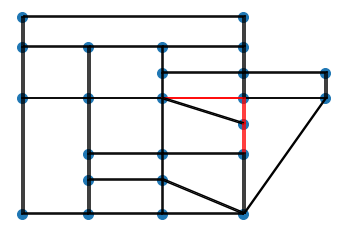

In [15]:
plt.scatter(df_node['X'],df_node['Y'],s=100)
for i in range(len(df_net)):
    if len(lis[((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))|((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))])==0:
        if df_net['Init_node'][i]>df_net['Term_node'][i]:
            plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='k')
        else:
            plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='k')
    else:
        if df_net['Init_node'][i]>df_net['Term_node'][i]:
            plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='r')
        else:
            plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='r')
plt.axis('off')

(31400.0, 440600.0, 26900.0, 535100.0)

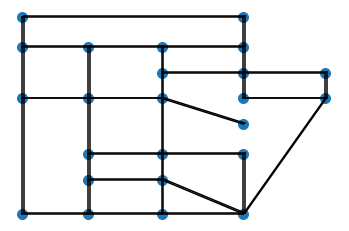

In [16]:
plt.scatter(df_node['X'],df_node['Y'],s=100)
for i in range(len(df_net)):
    if len(lis[((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))|((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))])==0:
        if df_net['Init_node'][i]>df_net['Term_node'][i]:
            plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='k')
        else:
            plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='k')
plt.axis('off')

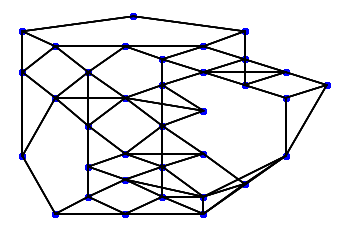

In [17]:
for i in range(len(df_net)-1):
    for j in range(i+1,len(df_net)):
        if ([i,j] in ar_dual[:,1:3].tolist()):
            plt.scatter(df_net['laneX'][i],df_net['laneY'][i],c='b')
            plt.scatter(df_net['laneX'][j],df_net['laneY'][j],c='b')
            plt.plot([df_net['laneX'][i],df_net['laneX'][j]],[df_net['laneY'][i],df_net['laneY'][j]],c='k')
plt.axis('off')
plt.show()

0
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]]


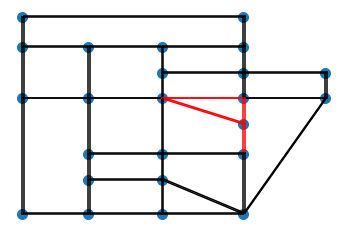

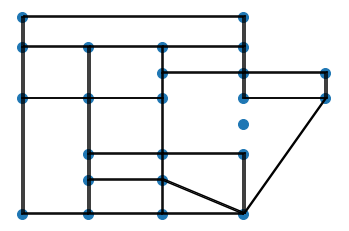

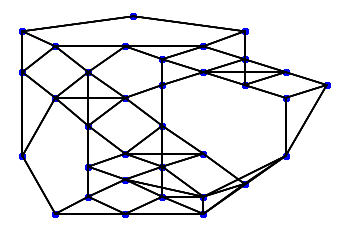

8
[5.184210526315789, 4.785714285714286, 4.735294117647059]
1
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]]


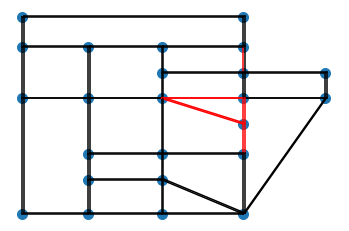

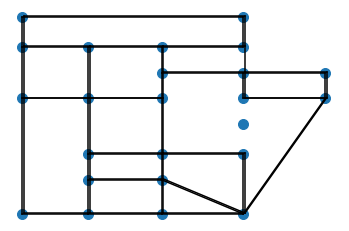

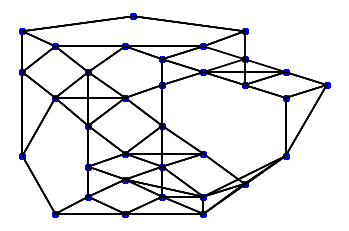

9
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119]
2
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]]


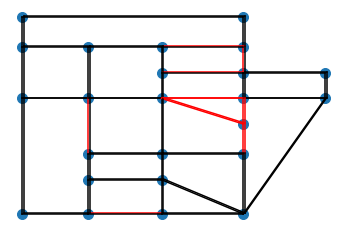

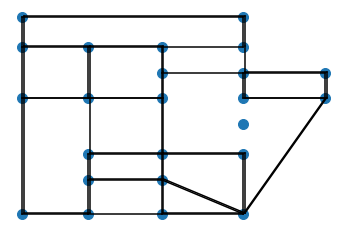

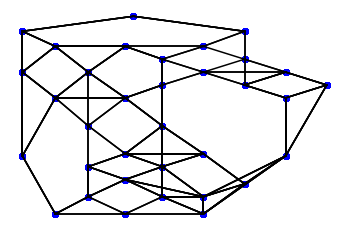

13
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333]
3
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]]


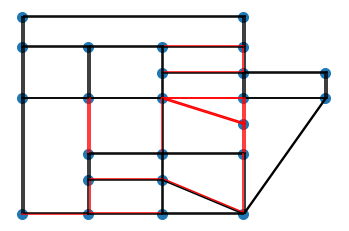

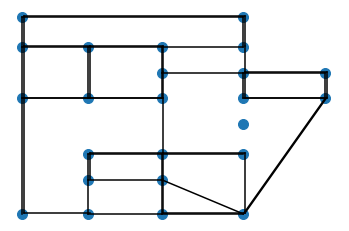

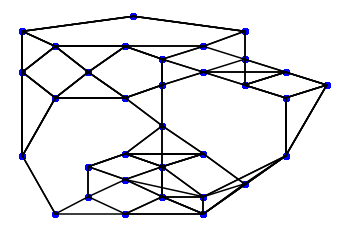

20
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857]
4
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]]


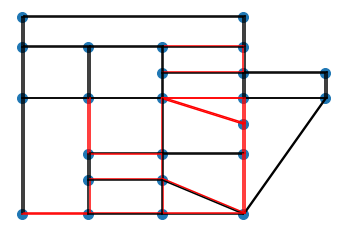

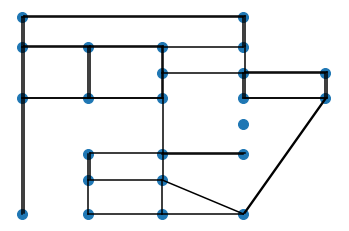

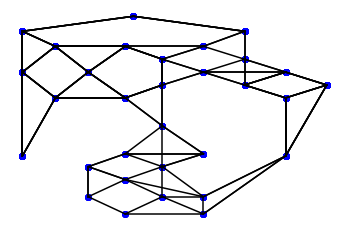

26
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36]
5
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]
 [ 5  9]
 [12 11]
 [22 20]]


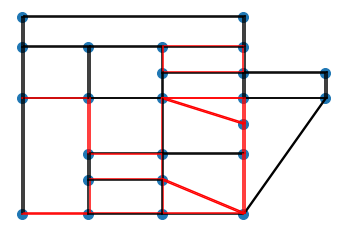

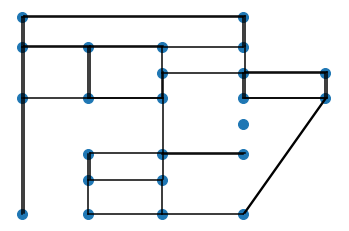

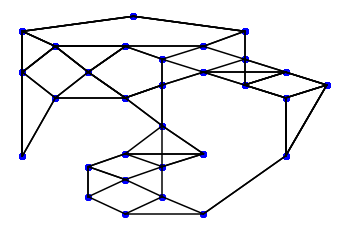

29
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404]
6
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]
 [ 5  9]
 [12 11]
 [22 20]
 [ 2  6]
 [ 4 11]
 [11 10]
 [21 20]
 [22 21]]


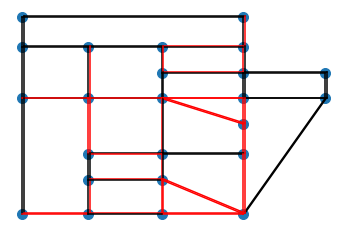

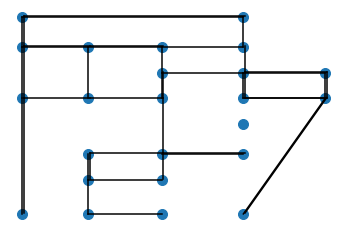

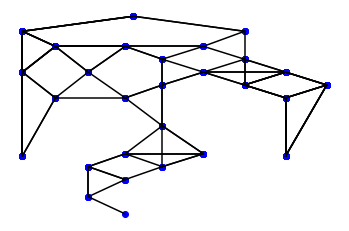

34
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404, 2.857142857142857]
7
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]
 [ 5  9]
 [12 11]
 [22 20]
 [ 2  6]
 [ 4 11]
 [11 10]
 [21 20]
 [22 21]]


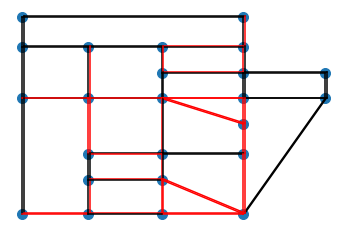

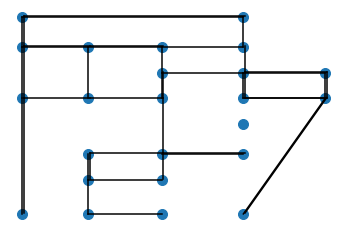

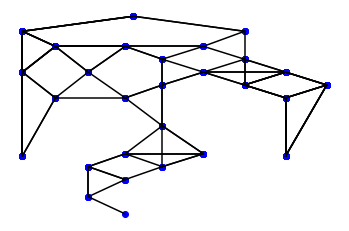

34
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404, 2.857142857142857, 2.857142857142857]
8
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]
 [ 5  9]
 [12 11]
 [22 20]
 [ 2  6]
 [ 4 11]
 [11 10]
 [21 20]
 [22 21]]


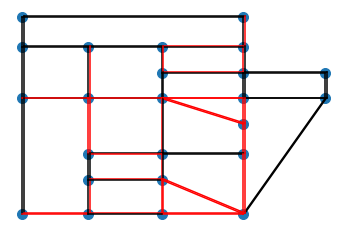

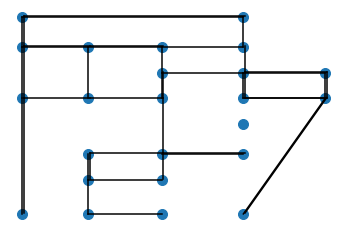

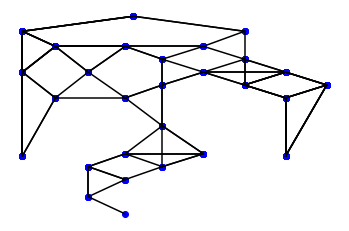

34
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404, 2.857142857142857, 2.857142857142857, 2.857142857142857]
9
[[10 16]
 [16 10]
 [16 17]
 [17 16]
 [17 19]
 [19 17]
 [10 17]
 [17 10]
 [ 8  6]
 [ 5  6]
 [ 8  9]
 [14 11]
 [21 24]
 [11 14]
 [15 10]
 [20 19]
 [20 22]
 [22 23]
 [23 24]
 [24 13]
 [13 24]
 [15 14]
 [19 20]
 [20 21]
 [21 22]
 [22 15]
 [ 5  9]
 [12 11]
 [22 20]
 [ 2  6]
 [ 4 11]
 [11 10]
 [21 20]
 [22 21]]


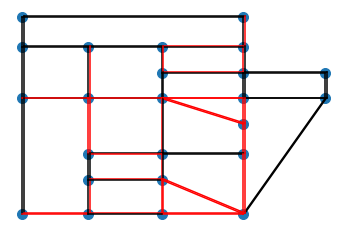

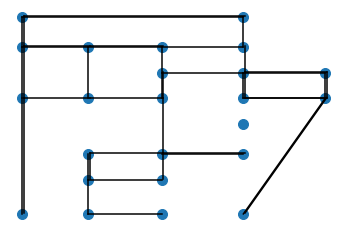

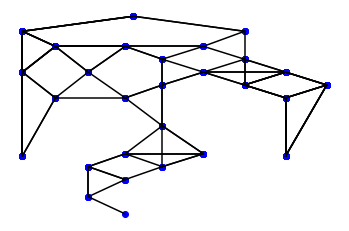

34
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404, 2.857142857142857, 2.857142857142857, 2.857142857142857, 2.857142857142857]
[5.184210526315789, 4.785714285714286, 4.735294117647059, 4.641791044776119, 4.333333333333333, 3.732142857142857, 3.36, 3.106382978723404, 2.857142857142857, 2.857142857142857, 2.857142857142857, 2.857142857142857]


In [18]:
for i in range(10):
    print(i)
    failure = []
    ar_copy = ar.copy()
    capacity_copy = capacity.copy()
    for i in range(len(lis)):
        ar_copy[lis[i][0]-1,lis[i][1]-1]=100000
        capacity_copy[lis[i][0]-1,lis[i][1]-1]=0.0001
    def BPR(Q, alpha = 0.15, beta = 4):
        t = ar_copy * (1 + alpha * (Q / capacity_copy) ** beta)
        return t

    def floyd(d):
        p = np.zeros(d.shape)
        for i in range(len(p)):
            p[i,:] = i
        for n in range(len(d)):
            for i in range(len(d)):
                for j in range(len(d)):
                    if (i == n) or (j == n):
                        continue
                    if d[i][j] > d[i][n] + d[n][j]:
                        d[i][j] = d[i][n] + d[n][j]
                        p[i][j] = p[n][j]
        return p

    def short_matrix(matrix,o,d):
        short_path_matrix = np.zeros(matrix.shape)
        col = matrix[o,:]
        a = int(col[d])
        while True:
            if a!=o:
                short_path_matrix[a][d]=1
                d = a
                a = int(col[d])
            else:
                short_path_matrix[a][d]=1
                break
        return short_path_matrix

    def all_or_nothing(Q):
        flow = np.zeros(Q.shape)
        path = floyd(BPR(Q))
        for i in range(len(Q)):
            for j in range(len(Q)):
                flow = flow + short_matrix(path,i,j) * OD[i][j]
        return flow

    def bisearch(function, l = 0, r = 1, j = 0.00001):
        if function(l)*function(r)>=0:
            if abs(function(l)) <= abs(function(r)):
                return l
            else: 
                return r

        z = (l+r)/2
        while r-l>j:
            if (function(z))*(function(l))>0:
                l = z
                z = (l+r)/2
            elif (function(z))*(function(l))<0:
                r = z
                z = (l+r)/2
            else:
                break
        return z

    def error(z,x,y):
        frac = np.sqrt(((z*(y-x))**2).sum())
        return frac/x.sum()

    def d_fun(z):
        return ((y-x)*BPR(x+z*(y-x))).sum()

    Q = np.zeros(OD.shape)
    x = all_or_nothing(Q)
    gap = 1
    n = 0
    while gap > 0.00001:
        y = all_or_nothing(x)
        lamda = bisearch(d_fun)
        gap = error(lamda,x,y)
        x = x + lamda * (y - x)
    lis = lis.tolist()
    for i in range(24):
        for j in range(24):
            if x[i][j]>capacity[i][j]:
                lis.append([i+1,j+1])
    news_ids = []
    for id in lis:
        if (id not in news_ids)&(id in net_list):
            news_ids.append(id)
    lis = news_ids
    ar_dual_index = []
    lis_init_ = []
    lis_term_ = []
    for i in range(len(ar_dual)):
        if (lis_init[i] not in lis)&(lis_term[i] not in lis):
            lis_init_.append(lis_init[i])
            lis_term_.append(lis_term[i])
            ar_dual_index.append(i)
    lis = np.array(lis)
    lis_init = lis_init_
    lis_term = lis_term_
    ar_dual = ar_dual[ar_dual_index]
    print(lis)
    ava_degree.append(len(ar_dual)/(76-len(lis)))
    plt.scatter(df_node['X'],df_node['Y'],s=100)
    for i in range(len(df_net)):
        if len(lis[((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))|((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))])==0:
            if df_net['Init_node'][i]>df_net['Term_node'][i]:
                plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='k')
            else:
                plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='k')
        else:
            if df_net['Init_node'][i]>df_net['Term_node'][i]:
                plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='r')
            else:
                plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='r')
            failure.append(lis[((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))|((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))])
            
    plt.axis('off')
    plt.show()
    plt.scatter(df_node['X'],df_node['Y'],s=100)
    for i in range(len(df_net)):
        if len(lis[((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))|((lis[:,0]==df_net['Init_node'][i])&(lis[:,1]==df_net['Term_node'][i]))])==0:
            if df_net['Init_node'][i]>df_net['Term_node'][i]:
                plt.plot([df_net['X_init'][i],df_net['X_term'][i]],[df_net['Y_init'][i],df_net['Y_term'][i]],c='k')
            else:
                plt.plot([df_net['X_init'][i]+2000,df_net['X_term'][i]+2000],[df_net['Y_init'][i]+2000,df_net['Y_term'][i]+2000],c='k')
    plt.axis('off')
    plt.show()
    
    for i in range(len(df_net)-1):
        for j in range(i+1,len(df_net)):
            if ([i,j] in ar_dual[:,1:3].tolist()):
                plt.scatter(df_net['laneX'][i],df_net['laneY'][i],c='b')
                plt.scatter(df_net['laneX'][j],df_net['laneY'][j],c='b')
                plt.plot([df_net['laneX'][i],df_net['laneX'][j]],[df_net['laneY'][i],df_net['laneY'][j]],c='k')
    plt.axis('off')
    plt.show()
    
    print(len(failure))
    print(ava_degree)
print(ava_degree)
        
    


Text(0, 0.5, 'ava_degree')

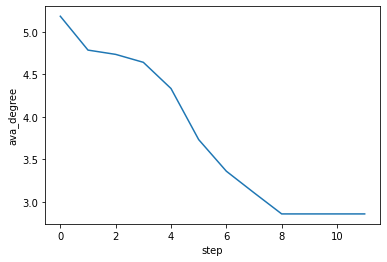

In [19]:
plt.plot(ava_degree)
plt.xlabel('step')
plt.ylabel('ava_degree')